In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

load in data and check data type

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Yu Lab/carprice - continuous outcome/carprice.csv')
df = df.iloc[:,1:]
df.shape, df.dtypes

((205, 25), symboling             int64
 CarName              object
 fueltype             object
 aspiration           object
 doornumber           object
 carbody              object
 drivewheel           object
 enginelocation       object
 wheelbase           float64
 carlength           float64
 carwidth            float64
 carheight           float64
 curbweight            int64
 enginetype           object
 cylindernumber       object
 enginesize            int64
 fuelsystem           object
 boreratio           float64
 stroke              float64
 compressionratio    float64
 horsepower            int64
 peakrpm               int64
 citympg               int64
 highwaympg            int64
 price               float64
 dtype: object)

In [3]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# change data type of a variable
df['symboling']=df['symboling'].astype('object')
df.dtypes

symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

check multicolinearity

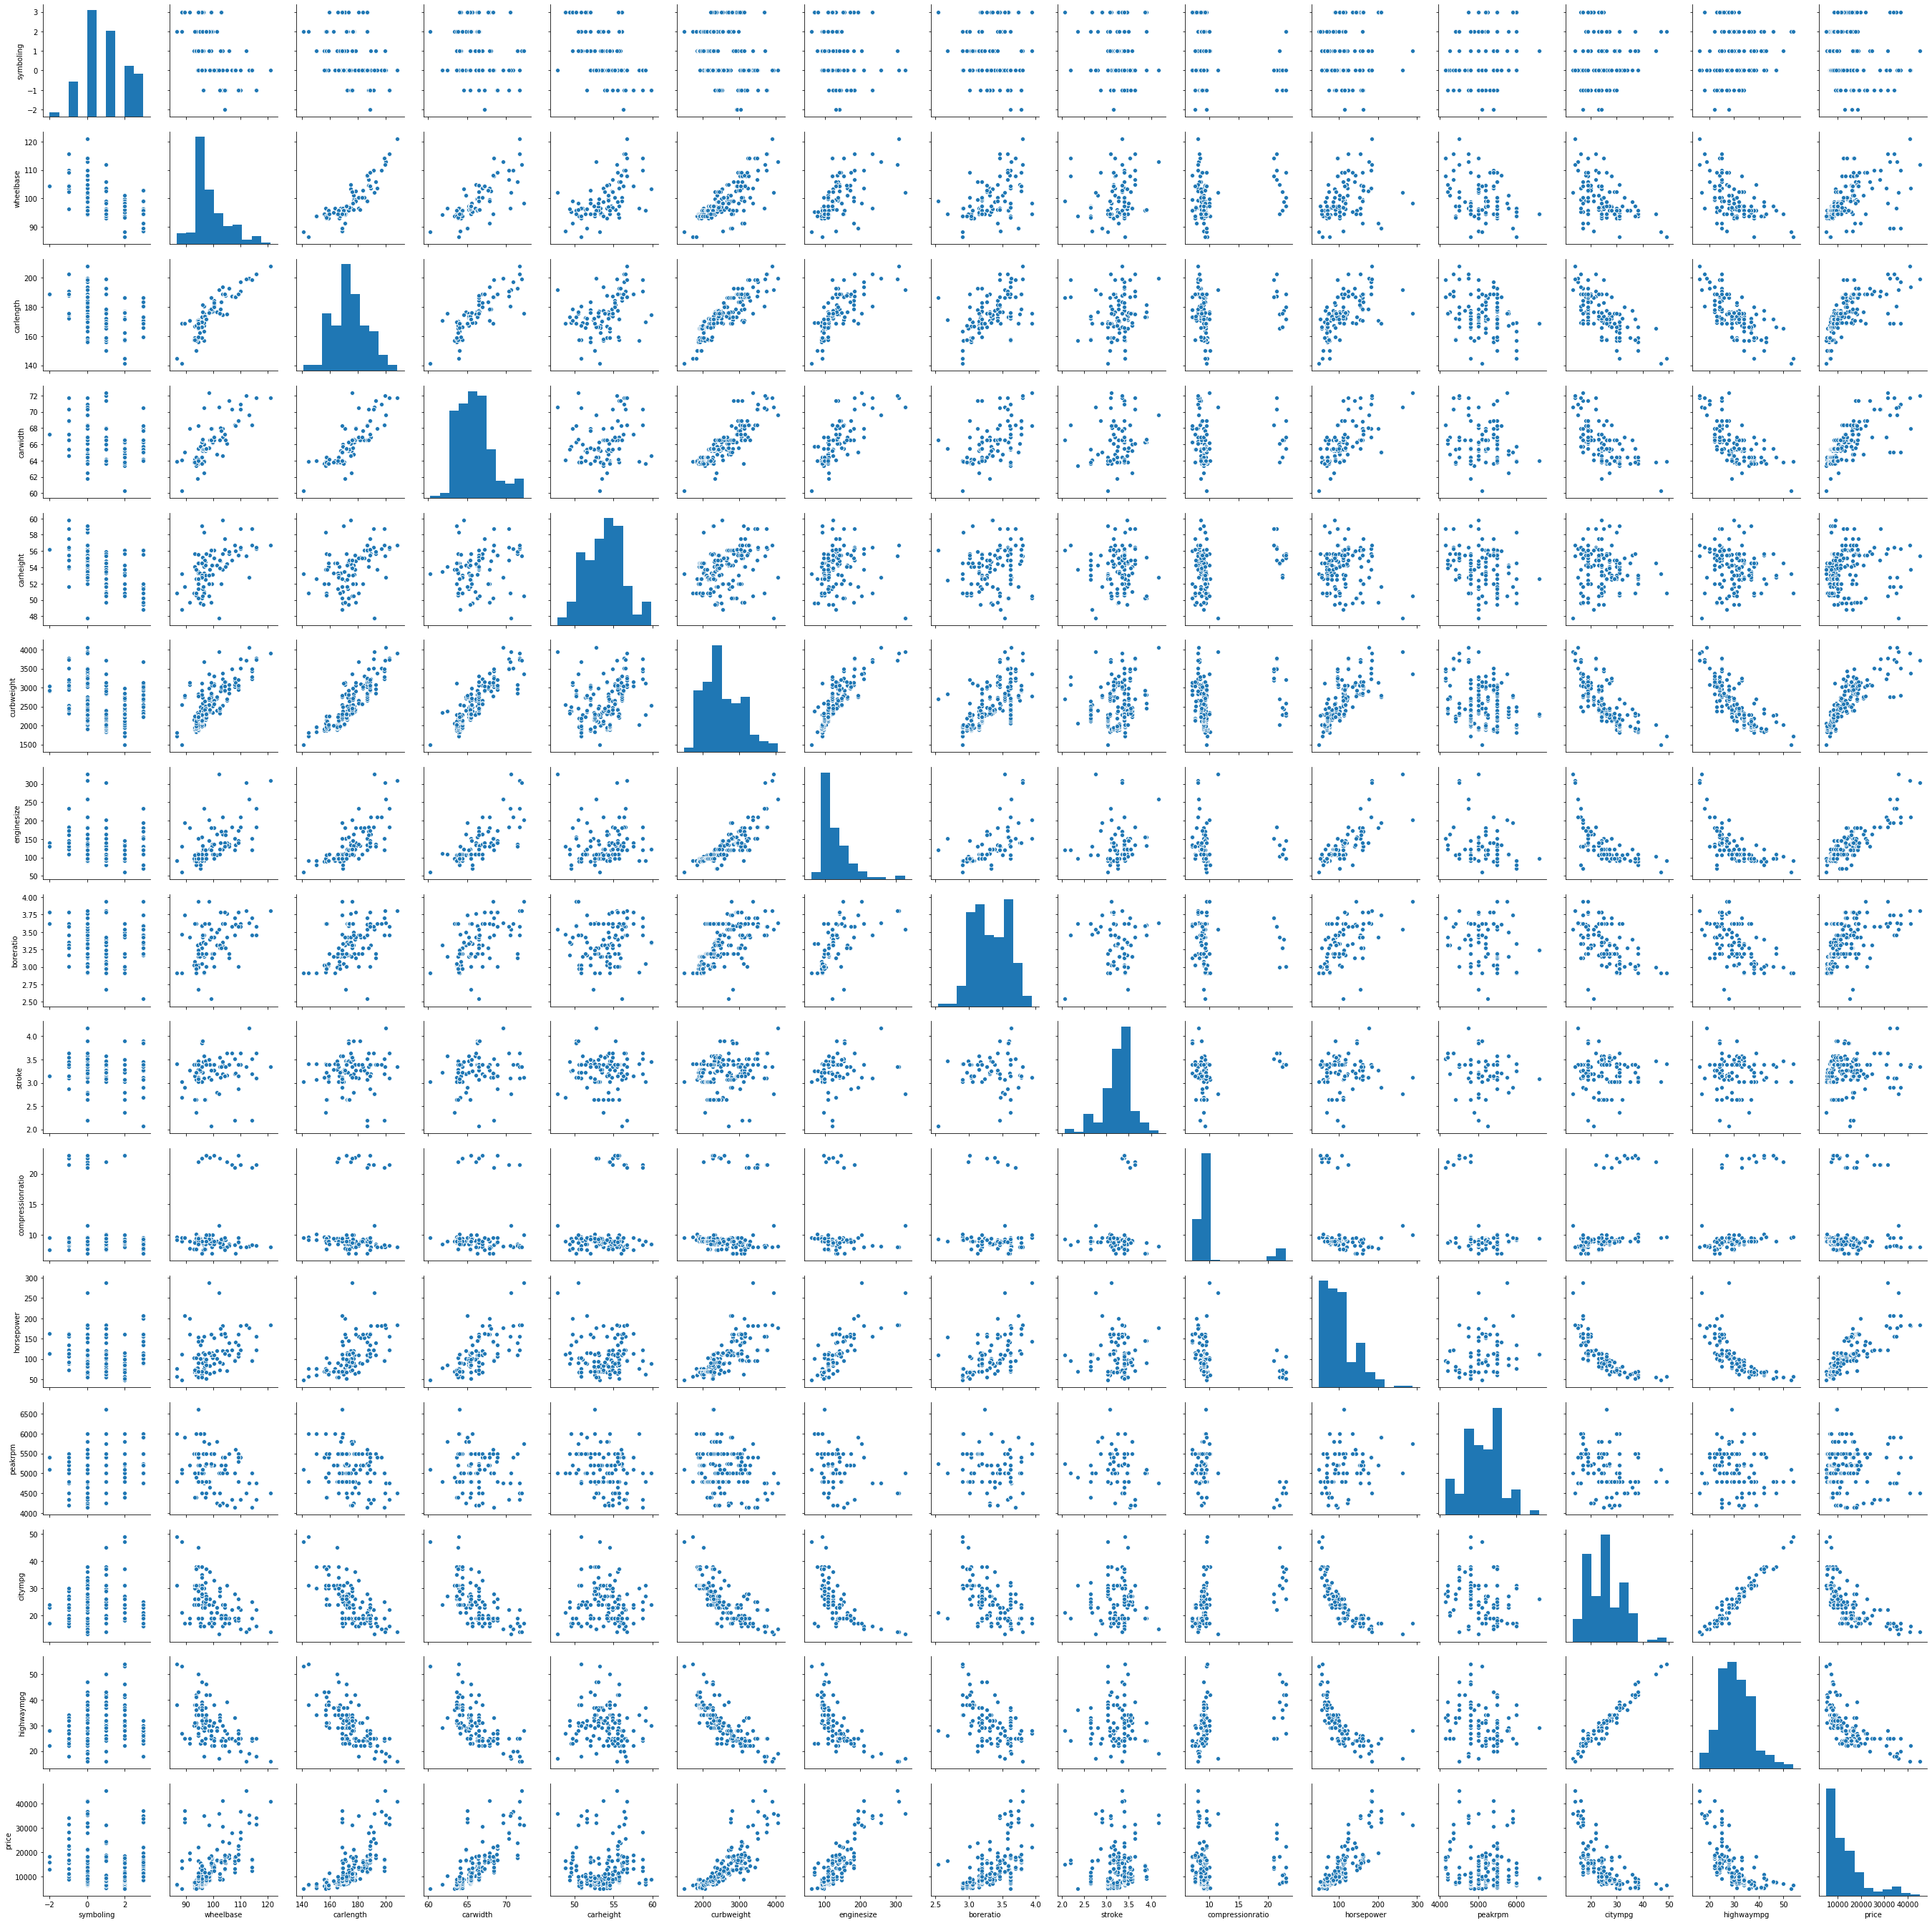

In [5]:
sns.pairplot(df)

In [6]:
# correlation
cor = df.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


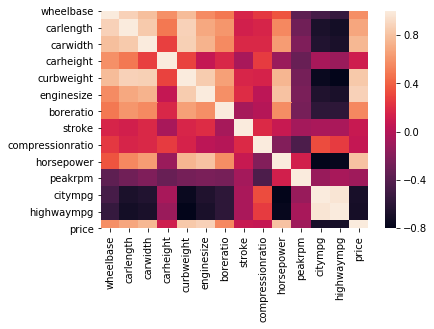

In [7]:
sns.heatmap(cor)

create dummy variables for categorical variables

In [8]:
# encoding: create dummy variable
enc = OneHotEncoder(handle_unknown='ignore')
edf = pd.DataFrame(enc.fit_transform(df[['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation','enginetype','cylindernumber',
 'fuelsystem',
]]).toarray())
edf.columns = enc.get_feature_names(['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation','enginetype','cylindernumber',
 'fuelsystem',
])
edf.head()

,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
df.drop(['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation','enginetype','cylindernumber',
 'fuelsystem',
] ,axis=1, inplace=True)

df= pd.concat([df, edf ], axis=1)

In [10]:
df.iloc[1:5,:15]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.0


split data for train and test dataset

In [22]:
y = df.price
x = df.drop(['price'], axis = 1)
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.3)

normalize continuous variables

In [23]:
scaler = StandardScaler()
xtrain.iloc[:,:13] = scaler.fit_transform(xtrain.iloc[:,:13])
xtest.iloc[:,:13] = scaler.transform(xtest.iloc[:,:13])

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


create random forest model for regession

In [13]:
regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

check test dataset prediction and error

In [14]:
ypred = regressor.predict(xtest)

In [15]:
errors = abs(ytest - ypred)
errors.mean()

1862.201080645161

In [18]:
# add predicted prcice column,error column, and percentage of error column back to original data 
xtest['price'] = ytest
xtest["predicted_price"] = ypred
xtest["abs_error"] = abs(ypred - ytest)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [19]:
# check prediction outcome
xtest.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,predicted_price,abs_error,price
119,-0.860157,-1.273758,-0.938596,-1.201370,-0.753689,-0.624243,-1.106885,0.406926,-0.652905,0.000352,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8402.9,445.9,7957.0
144,-0.292850,-0.101495,-0.204154,0.267330,-0.265896,-0.394293,1.110301,-2.109961,-0.290843,-0.503432,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9271.7,38.7,9233.0
133,0.068163,1.062794,0.300775,1.022661,0.322492,-0.095357,0.809666,-0.666946,-0.213258,0.201866,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14937.4,2767.4,12170.0
11,0.429177,0.281285,-0.479570,0.267330,-0.246916,-0.394293,0.659348,-1.573025,-0.342566,-0.024837,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13211.8,3713.2,16925.0
153,-0.516335,-0.284910,-1.030402,2.281547,-0.465189,-0.762213,-1.031726,-0.801180,-0.290843,-1.007215,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8241.2,1323.2,6918.0


cross validation

In [24]:
y = df.price
x = df.drop(['price'], axis = 1)
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.3)
scaler = StandardScaler()
xtrain.iloc[:,:13] = scaler.fit_transform(xtrain.iloc[:,:13])
xtest.iloc[:,:13] = scaler.transform(xtest.iloc[:,:13])

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [160,165, 170, 175, 180],
    'max_features': [90,100,110,120,130,140],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [50,60,70,80]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [45]:
# find best parameters with cross validation
grid_search.fit(xtrain, ytrain)
grid_search.best_params_

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  5.3min finished
C:\Users\Lenovo\Anaconda3\lib\site-p

{'bootstrap': True,
 'max_depth': 180,
 'max_features': 140,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [26]:
# refit model with best parameters and check error
regressor = RandomForestRegressor(bootstrap=True,max_depth= 180,max_features= 140,min_samples_leaf= 3,
 min_samples_split= 4,n_estimators=50)
regressor.fit(xtrain, ytrain)
ypred = regressor.predict(xtest)
errors = abs(ytest - ypred)
errors.mean()

1725.6824514705713

In [27]:
# add predicted prcice column,error column, and percentage of error column back to original data 
xtest['price'] = ytest
xtest["predicted_price"] = ypred
xtest["abs_error"] = abs(ypred - ytest)
# check prediction outcome
xtest.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price,predicted_price,abs_error
93,-0.680172,-0.278494,-0.942759,-0.114909,-0.977291,-0.696072,-0.624402,0.126521,-0.195109,-0.816610,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7349.0,7623.776405,274.776405
203,1.753944,1.199139,1.415918,0.675092,1.260657,0.423384,-1.129067,0.481909,3.229199,0.091669,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22470.0,17392.711262,5077.288738
42,-0.346731,-0.365881,0.074709,-1.102410,-0.472674,-0.392886,-0.624402,1.063453,-0.270645,-0.055619,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10345.0,9183.634922,1161.365078
178,0.720278,0.778093,0.860935,-0.707410,0.808565,1.029756,-0.191833,0.320369,-0.220288,1.441813,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16558.0,17504.194381,946.194381
161,-0.480108,-0.588320,-0.665268,-0.391409,-0.793453,-0.672750,-0.480213,-0.713487,-0.295824,-0.792062,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8358.0,7940.027019,417.972981
